In [5]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pgf import _tex_escape as mpl_common_texification
import numpy as np
import tikzplotlib

ImportError: cannot import name 'common_texification' from 'matplotlib.backends.backend_pgf' (C:\Users\leona\Desktop\dual_axis_accelerometer\python\lib\site-packages\matplotlib\backends\backend_pgf.py)

In [2]:
# Some useful constants and parameters
rho = 2320 # [kg/m^3] - polysilicon mass density
E = 169e9  # [Pa] - polysilicon Young's modulus
g = 9.81 # [m/s^2] - Earth gravitational acceleration
w_m = 800e-6 # [m] - central mass width
l_m = 800e-6 # [m] - central mass length
t_m = 4e-6   # [m] - central mass thickness
w_f = 10e-6  # [m] - movable fingers width
l_f = 400e-6 # [m] - movable fingers length
t_f = 4e-6   # [m] - movable fingers thickness
l_bx = 700e-6 # [m] - length of the straight beam
w_bx_default = 20e-6  # [m] - width  of the straight beam
t_bx_default = 4e-6   # [m] - thickness of the straight beam
l_by = 700e-6 # [m] - length of a segment of the folded beam
w_by = 20e-6 # [m] - width of a segment of the folded beam

# Sweep of acceleration along x axis

In [3]:
path = r'..\COMSOL\exported_data\a_x_sweep_data.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

a_x, eq_x_stiffness, mass, x_displacement, s_x, s_x_beam, c_x, c_y = zip(*xy_values)

a_x = np.array(a_x)
c_x = np.array(c_x)
c_y = np.array(c_y)
x_displacement = np.array(x_displacement)

AttributeError: module 'matplotlib.backends.backend_pgf' has no attribute 'common_texification'

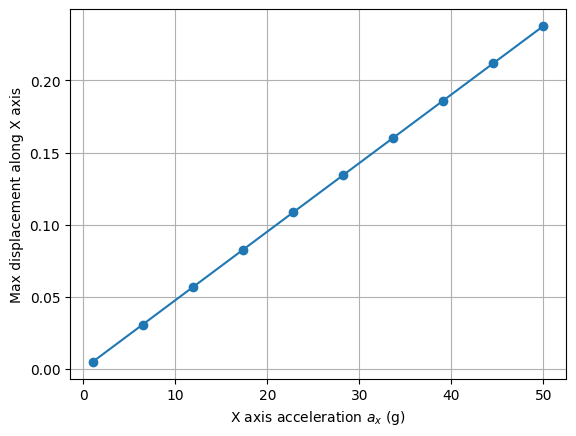

In [4]:
plt.plot(a_x, x_displacement, "o-")
plt.xlabel("X axis acceleration $a_x$ (g)")
plt.ylabel("Max displacement along X axis")
plt.grid('on')
tikzplotlib.save("test.tex")

In [4]:
# Let's compare the equivalent stiffness coefficients obtained in the full simulation and in the single beam simulation

path = r'..\COMSOL\exported_data\x_stiffness.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

a_x, x_stiffness, x_compliance, x_beam_displacement = zip(*xy_values)

a_x = np.array(a_x)
eq_x_stiffness = np.array(eq_x_stiffness)
x_stiffness = np.array(x_stiffness)
x_stiffness_complex = np.array([4*E*(t_bx_default)*pow((w_bx_default/2)/l_bx, 3)*(l_bx-l_by/3.6)/(l_bx+0.3*l_by)] * len(a_x))
x_stiffness_ideal = np.array([4*E*(t_bx_default)*pow((w_bx_default/2)/l_bx, 3)] * len(a_x))
x_displacement = np.array(x_displacement)
x_beam_displacement = np.array(x_beam_displacement)

In [5]:
x_beam_displacement/x_displacement

array([1.88551607, 1.88570984, 1.88591031, 1.88611746, 1.88633128,
       1.88655176, 1.88677891, 1.88701271, 1.88725316, 1.88750024])

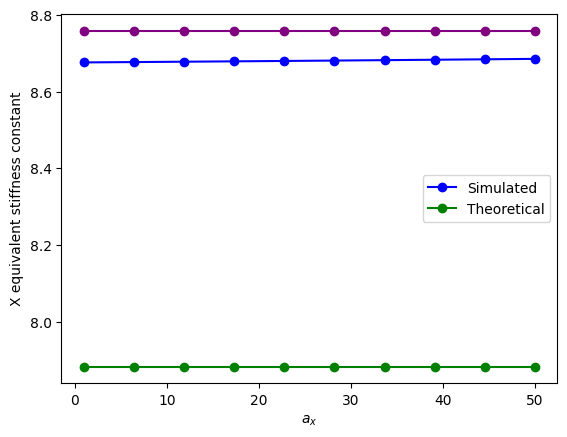

In [6]:
plt.plot(a_x, 4*eq_x_stiffness, "o-", color='blue', label="Simulated")
#plt.plot(a_x, x_stiffness, "o-", color='red')
plt.plot(a_x, x_stiffness_ideal, "o-", color='green', label="Theoretical")
plt.plot(a_x, 2*x_stiffness_complex, "o-", color='purple')
plt.xlabel("$a_x$")
plt.ylabel("X equivalent stiffness constant")
plt.legend()

# Sweep of acceleration along y axis

In [115]:
path = r'..\COMSOL\exported_data\a_y_sweep_data.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

a_y, eq_y_stiffness, mass, y_displacement, s_y, s_y_beam, c_x, c_y = zip(*xy_values)

In [116]:
# Let's compare the equivalent stiffness coefficients obtained in the full simulation and in the single beam simulation

path = r'..\COMSOL\exported_data\y_stiffness.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

a_y, y_stiffness, y_compliance, y_beam_displacement = zip(*xy_values)

a_y = np.array(a_y)
eq_y_stiffness = np.array(eq_y_stiffness)
y_stiffness = np.array(y_stiffness)
y_stiffness_ideal = [E*t_bx_default*pow(w_by/l_by, 3)] * len(a_y)
y_beam_displacement = np.array(y_beam_displacement)
y_displacement = np.array(y_displacement)
mass = np.array(mass)

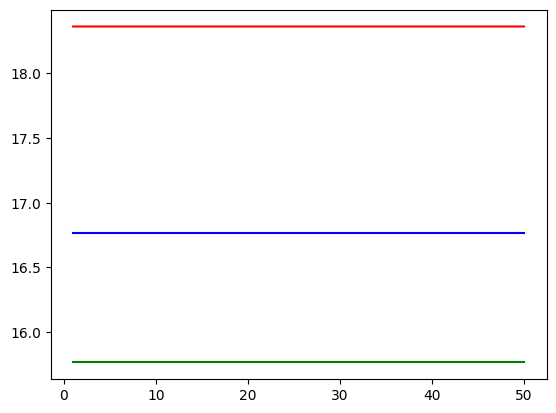

In [33]:
plt.plot(a_y, 4*eq_y_stiffness, color='blue')
plt.plot(a_y, y_stiffness, color='red')
plt.plot(a_y, y_stiffness_ideal, color='green')

# Sweep of straight beam thickness

In [58]:
path = r'..\COMSOL\exported_data\tbx_sweep_data.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

t_bx, s_x = zip(*xy_values)

t_bx = np.array(t_bx)*1e-6
s_x = np.array(s_x)*1e-6
s_x_ideal = (rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g*pow(l_bx,3))/(2*E*pow(w_bx_default,3)*t_bx)

In [59]:
s_x/s_x_ideal

array([1.24077819, 1.56249461, 1.85521012, 2.12766049, 2.3729034 ,
       2.60976895, 2.83604444, 3.05185889, 3.26526269, 3.46242725,
       3.65800462, 3.850493  , 4.03798816, 4.22395587, 4.42958976,
       4.61531526, 4.79680709, 4.97657431, 5.15713939, 5.33378354])

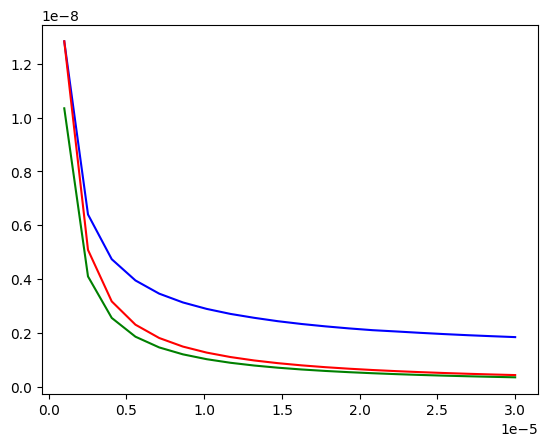

In [49]:
plt.plot(t_bx, s_x, color='blue')
plt.plot(t_bx, s_x[0]*t_bx[0]/t_bx, color='red')
plt.plot(t_bx, s_x_ideal, color='green')

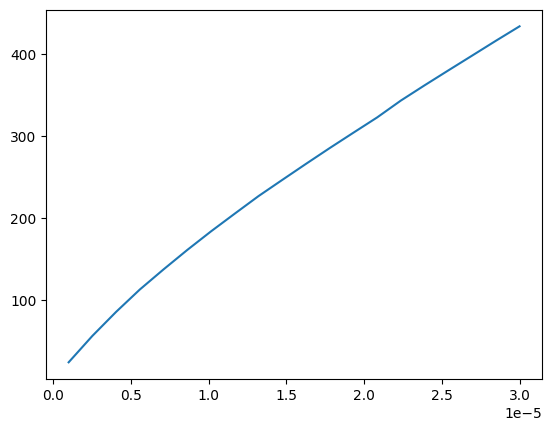

In [50]:
plt.plot(t_bx, 100*(s_x-s_x_ideal)/s_x_ideal)

# Sweep of straight beam width

In [51]:
path = r'..\COMSOL\exported_data\wbx_sweep_data.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

w_bx, s_x = zip(*xy_values)
w_bx = np.array(w_bx)*1e-6
s_x = np.array(s_x)*1e-6
s_x_ideal = (rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g*pow(l_bx,3))/(2*E*pow(w_bx,3)*t_bx_default)

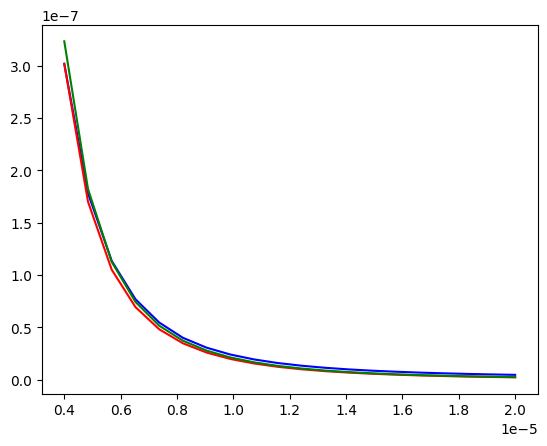

In [52]:
plt.plot(w_bx, s_x, color='blue')
plt.plot(w_bx, s_x[0]*pow(w_bx[0], 3)/pow(w_bx, 3), color='red')
plt.plot(w_bx, s_x_ideal, color='green')

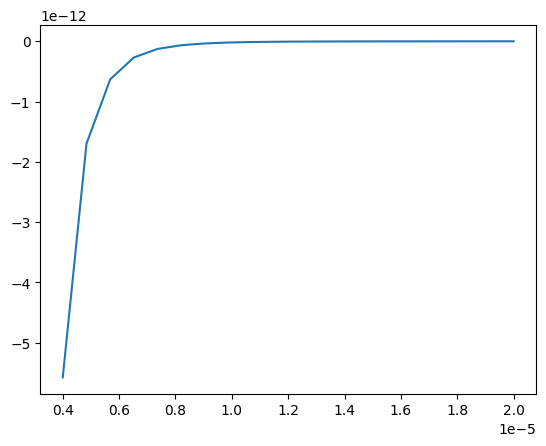

In [54]:
plt.plot(w_bx, 100*(s_x-2*s_x_ideal)/2*s_x_ideal)

In [57]:
s_x/(2*s_x_ideal)

array([0.4667698 , 0.48876781, 0.50394568, 0.51718226, 0.52928119,
       0.53689824, 0.5504829 , 0.56587538, 0.58299721, 0.60230667,
       0.62467195, 0.64844258, 0.67445355, 0.70313936, 0.735768  ,
       0.76704047, 0.80140843, 0.84011453, 0.87945154, 0.92038026])